Idea is to build a directed network of the query to any significant e-value hits

One the blast search is complete, build an edge list (directed), maybe weighted by e-value (1e-5), also need a node table (node information), may also need a query/search table for the user input.

Idea is to make a query, find that node, final all nodes that go out to that node and back, and then of those find the lowest path (lowest e-value path).

STATUS:
- cycles doesn't check the edge weight
- this has been most [helpful](https://en.wikipedia.org/wiki/Nearest_neighbor_graph)
- [my problem](https://stackoverflow.com/questions/25879159/shortest-distance-from-a-node-back-to-itself-in-a-weighted-directed-graph)

TODO:
- how to find hits that immediately loop back?
- find a shortest distance if not directly coming back?
    - show what nodes you'd have to go through to come back
- how many nodes will have NO hits?
- basic exploratory:
    - centrality
    - average degree
    - shortest path
    - longest path
    - what's missing from the graph
    - how many from yeast
    - how many from dros
    - any one-way edges?
    - clusters?

## Method
- create databases of sequences
- BLAST against each database, store hits in new file
- dump the hists into a pandas dataframe

In [ ]:
# do blastp query (only sig evalues)
# query yeast to dros-db: y2d-db_sig.xml
# query dros to yeast-db: d2y-db_sig.xml

In [47]:
# tools
import pandas as pd
from Bio.Blast import NCBIXML
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
df = pd.DataFrame(columns=['#query','hit','evalue'])
# df = df.append(data_dict)

In [131]:
# add 'y2d-db_sig.xml' to table
result_handle = open('y2d-db_sig.xml')
for blast_result in NCBIXML.parse(result_handle):
    q = blast_result.query.split('|')[3]
    for desc in blast_result.descriptions:
        hit = desc.title.split('|')[5]
        e = desc.e
        df = df.append({'#query':q,'hit':hit,'evalue':e}, ignore_index=True)

In [132]:
# add 'd2y-db_sig.xml' to table
result_handle = open('d2y-db_sig.xml')
for blast_result in NCBIXML.parse(result_handle):
    q = blast_result.query.split('|')[3]
    for desc in blast_result.descriptions:
        hit = desc.title.split('|')[5]
        e = desc.e
        df = df.append({'#query':q,'hit':hit,'evalue':e}, ignore_index=True)

In [133]:
# write database to tsv
df.to_csv('test_edges.tsv', index=False, sep='\t')

# the graph identification may have to be done by hand
- get all nodes connected to query node
- get all distances back to the query node
- sum the two distances for all, find one with minimal sum
- start by using a dictionary to manipulate/track data

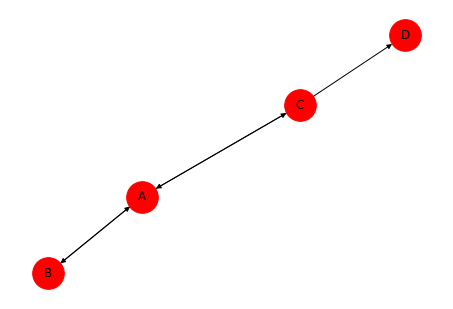

In [244]:
# test simple network
B = nx.DiGraph()
B.add_nodes_from(['A'], bipartite=0)
B.add_nodes_from(['B','C'], bipartite=1)
B.add_weighted_edges_from([('A','B',1), ('B','A',3),('A','C',1),('C','A',1),('C','D',5)])
nx.draw(B,node_size=1000, node_color='red', with_labels=True)
#plt.show()

In [249]:
nx.k_nearest_neighbors(B,source='in+out', nodes='A', weight='weight')

{4: 0.8333333333333334}

In [250]:
min_weight_neighbors = sorted(G[1].items(), key=lambda e: e[1]["weight"] if e[1]["weight"] != 0  else 1000000000)[:2] #remove edges with weight 0 from the computation
min_weight_neighbors

KeyError: 1

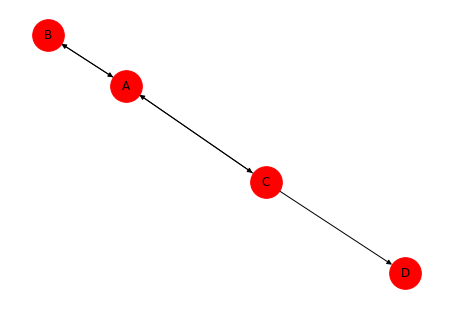

In [251]:
# test simple network
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D'])
G.add_weighted_edges_from([('A','B',1), ('B','A',3),('A','C',1),('C','A',1),('C','D',5)])
nx.draw(G,node_size=1000, node_color='red', with_labels=True)
#plt.show()

In [253]:
nx.closeness_centrality(G,distance='weight')

{'A': 0.3333333333333333,
 'B': 0.4444444444444444,
 'C': 0.26666666666666666,
 'D': 0.15}

In [240]:
nx.dijkstra_predecessor_and_distance(G,'A')

({'A': [], 'B': ['A'], 'C': ['A'], 'D': ['C']},
 {'A': 0, 'B': 1, 'C': 1, 'D': 6})

In [241]:
nx.bidirectional_dijkstra(G,'A','A')

(0, ['A'])

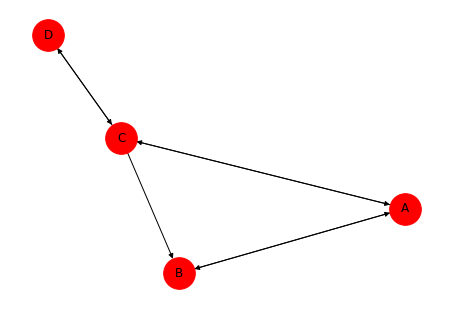

In [220]:
# test simple network
G = nx.DiGraph()
G.add_nodes_from(['A','B','C','D'])
G.add_weighted_edges_from([('A','B',3), ('B','A',1),('A','C',1),('C','A',1),('C','B',2),('C','D',3),('D','C',5)])
nx.draw(G,node_size=1000, node_color='red', with_labels=True)
#plt.show()

In [254]:
nx.find_cycle(G, 'A', 'original')

[('A', 'B', 'forward'), ('B', 'A', 'forward')]

In [214]:
# count bidirectional edges
0.5 * len( [ 1 for (u,v) in G.edges() if u in G[v] ] )

2.0

In [211]:
[i for i in G.neighbors('C')]

['B']

In [202]:
nx.shortest_path(G,'A','A')

['A']

In [207]:
nx.dijkstra_path(G,'A','A')

['A']

In [208]:
nx.single_source_dijkstra(G,'A')

({'A': 0, 'B': 1, 'C': 1}, {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C']})

In [205]:
nx.shortest_path_length(G,'C','A')

2

In [135]:
# now read edge-list as a directed graph
G = nx.read_weighted_edgelist(
    'test_edges.tsv', 
    delimiter='\t', 
    create_using=nx.DiGraph(),
    
)

In [137]:
G.number_of_nodes()

112

In [138]:
G.number_of_edges()

1932

In [180]:
deg_dict = dict(G.degree())
max(deg_dict, key=deg_dict.get)

'NP_010253.2'

In [182]:
deg_dict['NP_010253.2']

80

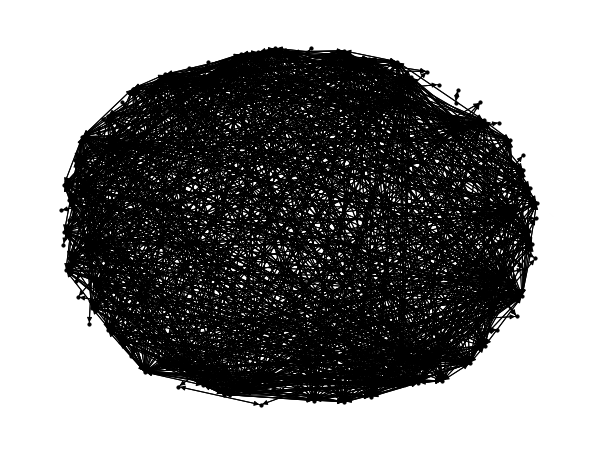

In [152]:
plt.figure(figsize=(8, 6))
nx.draw(G,node_size=10, node_color='black')

plt.show()

In [166]:
nx.get_node_attributes(G, 'evalue')

{}

In [153]:
# shortest cycle back based on weight (minimize weight)
nx.find_cycle(G, 'NP_010253.2')

[('NP_010253.2', 'NP_612028.4'), ('NP_612028.4', 'NP_010253.2')]

In [168]:
G.get_edge_data('NP_011801.1', 'NP_649284.1')

{'weight': 2.26254e-53}

In [175]:
nx.shortest_path(G, 'NP_010253.2', weight='weight')

{'NP_010253.2': ['NP_010253.2'],
 'NP_612028.4': ['NP_010253.2', 'NP_612028.4'],
 'NP_651970.1': ['NP_010253.2', 'NP_612028.4', 'NP_013093.1', 'NP_651970.1'],
 'NP_536783.1': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2',
  'NP_014287.1',
  'NP_536783.1'],
 'NP_524220.1': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2',
  'NP_014287.1',
  'NP_524220.1'],
 'NP_609888.2': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2'],
 'NP_723899.1': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2',
  'NP_014287.1',
  'NP_723899.1'],
 'NP_648062.2': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2',
  'NP_014287.1',
  'NP_648062.2'],
 'NP_572424.1': ['NP_010253.2',
  'NP_612028.4',
  'NP_013093.1',
  'NP_610090.1',
  'NP_011932.2',
  'NP_609888.2'

In [87]:
G.number_of_edges()

1933

In [167]:
!head test_edges.tsv

#query	hit	evalue
NP_011801.1	NP_649284.1	2.26254e-53
NP_014937.1	NP_729108.2	4.74589e-24
NP_010253.2	NP_612028.4	1.92836e-134
NP_010253.2	NP_651970.1	1.29051e-63
NP_010253.2	NP_536783.1	3.31854e-61
NP_010253.2	NP_524220.1	3.65438e-58
NP_010253.2	NP_609888.2	1.17058e-57
NP_010253.2	NP_723899.1	5.84833e-57
NP_010253.2	NP_648062.2	2.25898e-55


In [169]:
# color by eccentricity
plt.figure(figsize=(12,12))
cmap = plt.cm.viridis
nx.draw(G,
        node_size = 150,
        node_color=list(nx.eccentricity(G).values()) # color by eccentricity
       )
plt.title('Eccentricity')

NetworkXError: Found infinite path length because the digraph is not strongly connected

<Figure size 864x864 with 0 Axes>

In [172]:
len(G.nodes())

112

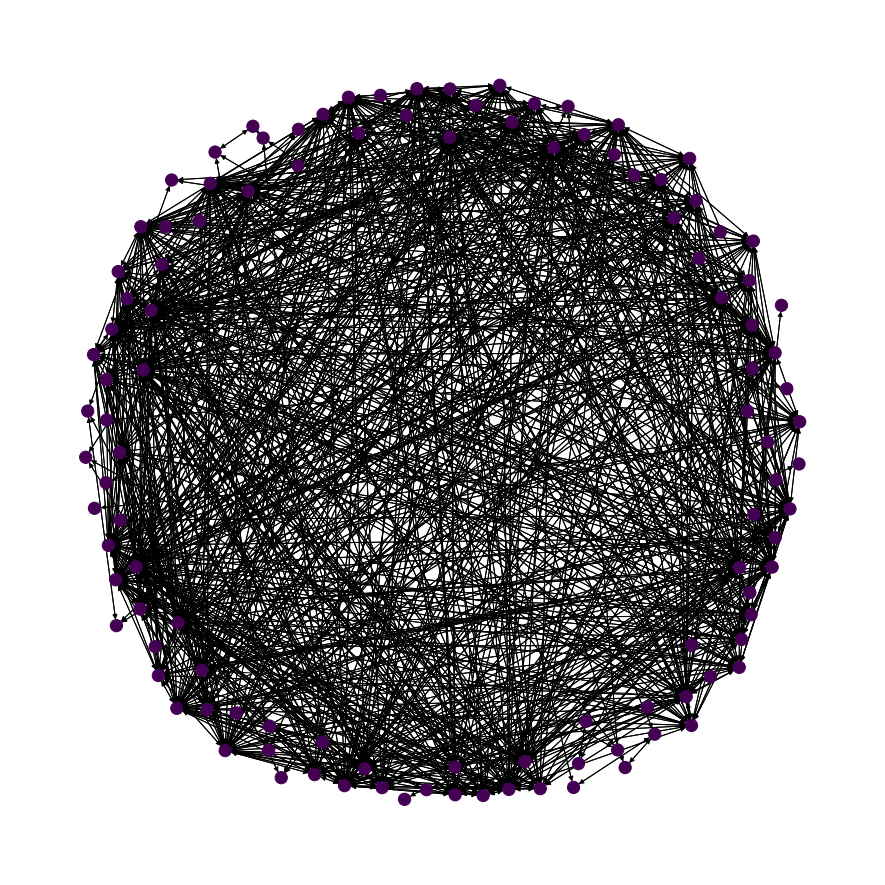

In [170]:
plt.figure(figsize=(12,12))
cmap = plt.cm.viridis
nx.draw(G,
        node_size = 150,
        node_color=list(nx.clustering(G).values())
)

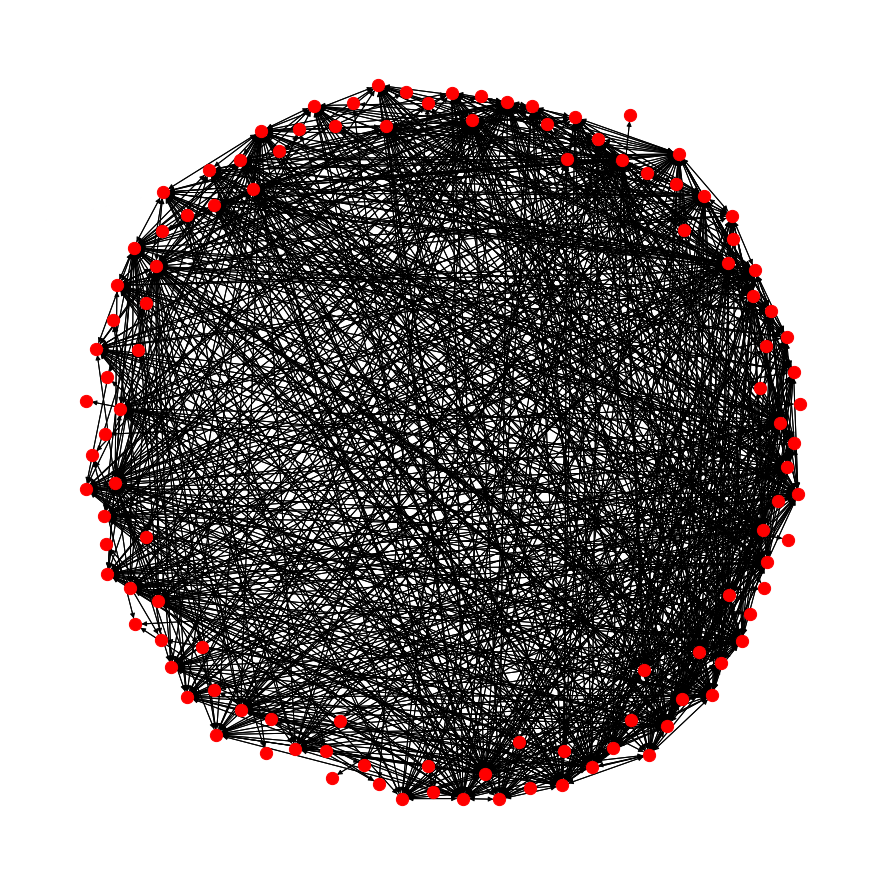

In [185]:
plt.figure(figsize=(12,12))
cmap = plt.cm.viridis
nx.draw(G,
        node_size = 150,
        node_color='red'
)

In [189]:
G.number_of_nodes()

112